# **Proyecto #8: Clustering y visualización de curvas de luz de estrellas periódicas**
## **EL4106 - Inteligencia Computacional - Primavera 2022**
### **Parte 2 : Reducción de dimensiones**
##### **Profesor:** Pablo Estevez
##### **Auxiliar:** Juan Uturria 
##### **Ayudante:** Rafael de la Sotta Vargas
##### **Estudiantes:** Macarena Ríos - Melanie Peña


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from google.colab import drive
from google.colab import files
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , QuantileTransformer
from sklearn.mixture import GaussianMixture
from sklearn import mixture

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Proyecto8/Features/over_under_sample.csv', index_col= False) #features totales dropeados

In [ ]:
DF = DF.drop(columns='Unnamed: 0')

In [ ]:
#Separamos la data para realizar oversampling y luego normalización
features = ["Multiband_period","g-W2","r-W2","g-r_max_corr","g-W3","g-r_mean","g-r_max","GP_DRW_tau_1","g-r_mean_corr",
            "IAR_phi_1","Amplitude_1","ExcessVar_1","delta_mag_fid_1",
            "Meanvariance_1","r-W3","Std_1","GP_DRW_sigma_1","GP_DRW_tau_2","PercentAmplitude_1",
            "W1-W2","W2-W3","SF_ML_amplitude_1","SPM_A_1","Gskew_1","Q31_1", "Autocor_length_1","IAR_phi_2",
            "SF_ML_gamma_1","Amplitude_2","delta_mag_fid_2"]


X = DF.loc[:, features] #se define la data correspondiente las características
Y = DF.loc[:, ['classALeRCE']] #se define la data correspondiente a las clases, que corresponde a el target

###Normalizacion

In [ ]:
scaler = QuantileTransformer()
X_2 = scaler.fit_transform(X)
X_2

array([[0.74012652, 0.83486039, 0.83110274, ..., 0.44241953, 0.85358832,
        0.87346348],
       [0.65267362, 0.21721964, 0.20979109, ..., 0.14649195, 0.60479878,
        0.59706293],
       [0.72883028, 0.67560383, 0.65702808, ..., 0.37174829, 0.73436459,
        0.71769589],
       ...,
       [0.56891432, 0.2108172 , 0.16537797, ..., 0.29305487, 0.83596973,
        0.81741355],
       [0.45203368, 0.00397523, 0.00325212, ..., 0.06117409, 0.4044211 ,
        0.36910749],
       [0.45641303, 0.39334775, 0.35313694, ..., 0.08028536, 0.9032921 ,
        0.88444289]])

#Autoencoder

###Keras install

In [ ]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 13.7 MB/s 
     |████████████████████████████████| 1.6 MB 65.7 MB/s 


In [ ]:
#para el autoencoder
import math
import tensorflow as tf
import keras_tuner.tuners as kt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

###Capas

In [ ]:
encoder = Sequential(
    [
      Dense(16, input_dim=X.shape[1],activation='relu'),
      Dense(8, activation="relu"),
      Dense(3, activation="relu")
    ]
)

decoder = Sequential(
    [
      Dense(8, input_dim=3, activation="relu"),
      Dense(16, activation="relu"),
      Dense(X.shape[1], activation="sigmoid")
    ]
)

In [ ]:
X.shape[1]

30

In [ ]:
inputs = Input(shape=(X_2.shape[1]))

x = encoder(inputs, training=True)
outputs = decoder(x, training=True)

auto_encoder = Model(inputs, outputs)
auto_encoder.compile(loss='mse', optimizer='adam')
auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 sequential (Sequential)     (None, 3)                 659       
                                                                 
 sequential_1 (Sequential)   (None, 30)                686       
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 750
history = auto_encoder.fit(X_2,X_2, epochs=epochs, batch_size=300)

Epoch 1/750
12/12 [==============================] - 1s 2ms/step - loss: 0.0881
Epoch 2/750
12/12 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 3/750
12/12 [==============================] - 0s 5ms/step - loss: 0.0864
Epoch 4/750
12/12 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 5/750
12/12 [==============================] - 0s 4ms/step - loss: 0.0822
Epoch 6/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0791
Epoch 7/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 8/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0725
Epoch 9/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0687
Epoch 10/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 11/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0598
Epoch 12/750
12/12 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 13/750
12/12 [=================

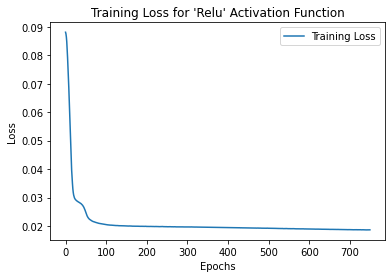

In [ ]:
loss = history.history['loss']

epochs_range = range(epochs)

plt.subplot(1, 1, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title("Training Loss for 'Relu' Activation Function")
plt.show()

In [ ]:
encoder_layer = auto_encoder.get_layer('sequential')
reduced_df = pd.DataFrame(encoder_layer.predict(X_2))
reduced_df = reduced_df.add_prefix('feature_')
reduced_df 

113/113 [==============================] - 0s 864us/step


,feature_0,feature_1,feature_2
0,5.546503,4.339890,9.726994
1,9.375792,5.886748,8.965343
2,3.684793,3.919521,7.007261
3,4.235098,3.383919,7.471564
4,4.130201,3.087427,6.590277
...,...,...,...
3595,6.769617,4.783760,5.940934
3596,6.440319,3.311612,4.240921
3597,6.127132,5.239994,7.762369
3598,10.912087,5.224038,6.800331


In [ ]:
u = Y.reset_index(drop=True)

In [ ]:
finaldf =  pd.concat([reduced_df,u],axis = 1)

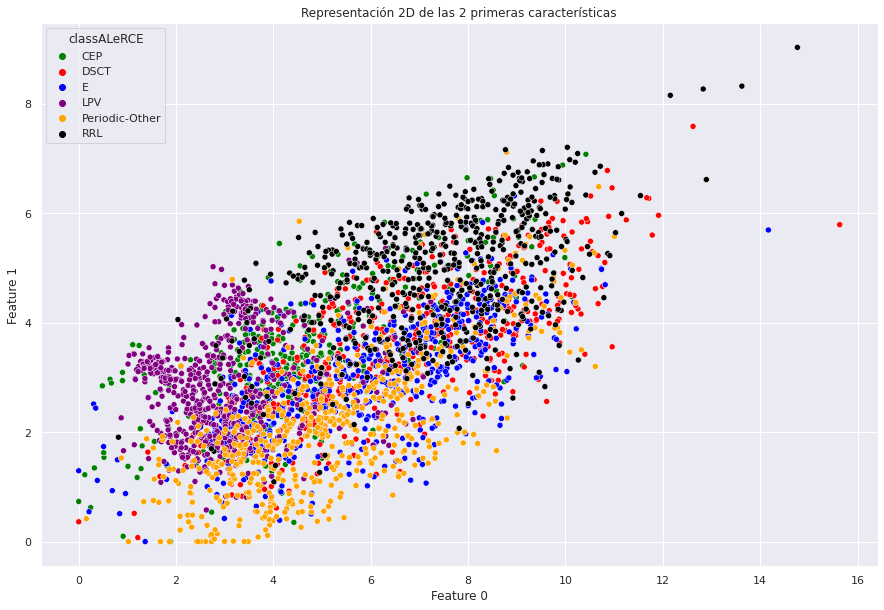

In [ ]:
sns.scatterplot(x='feature_0',y='feature_1',data=finaldf, hue='classALeRCE', palette=['green','red','blue','purple','orange','black'])
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Representación 2D de las 2 primeras características")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

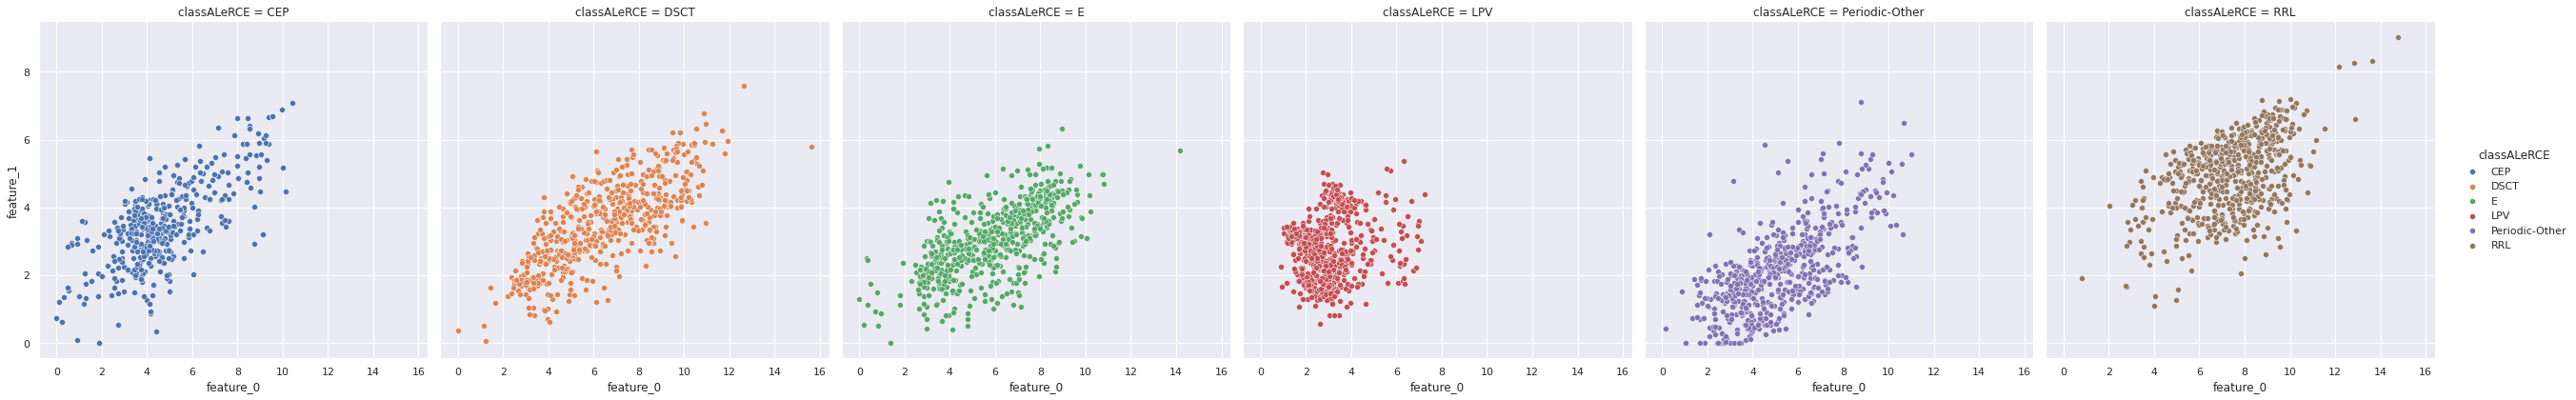

In [ ]:
grid = sns.FacetGrid(finaldf, col = "classALeRCE", hue = "classALeRCE", height=6)
grid.map(sns.scatterplot, "feature_0", "feature_1")
grid.add_legend()

Text(0.5, 0.92, 'Representación 3D de las características')

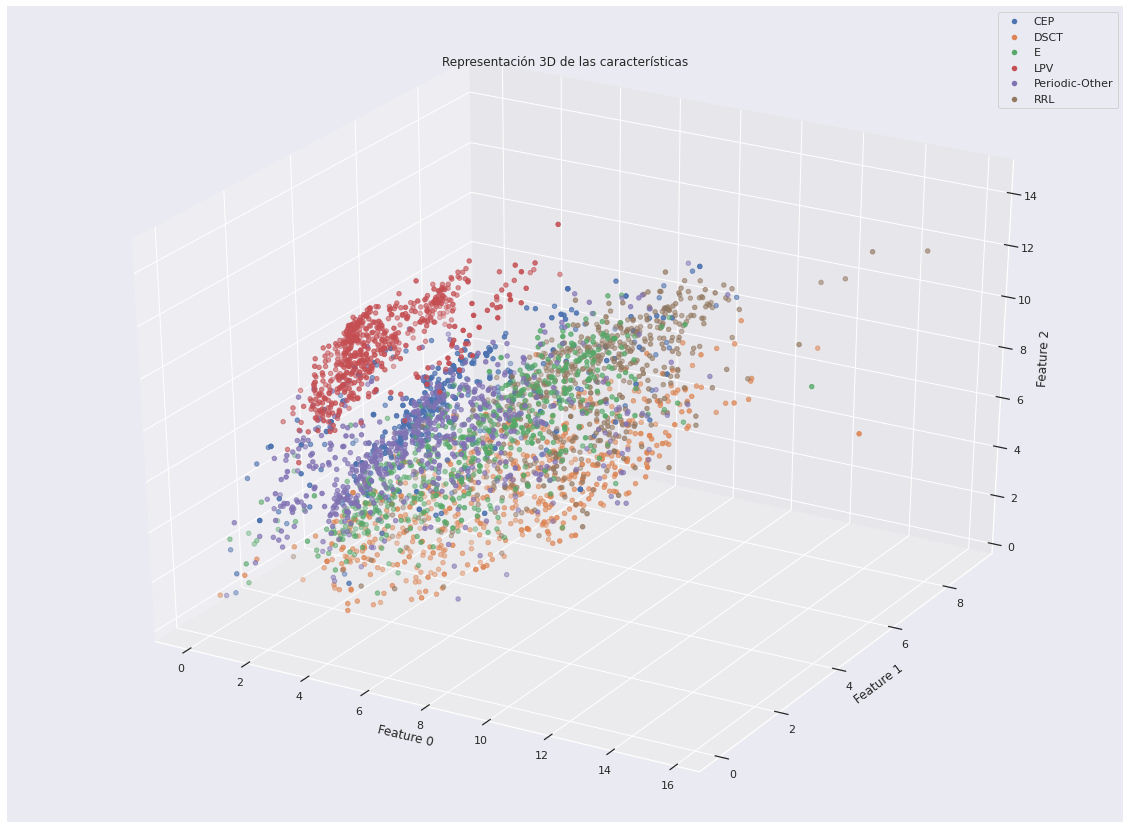

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for s in finaldf['classALeRCE'].unique():
    ax.scatter(finaldf.feature_0[finaldf.classALeRCE==s],finaldf.feature_1[finaldf.classALeRCE==s],finaldf.feature_2[finaldf.classALeRCE==s],label=s)    
ax.legend()
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
plt.title("Representación 3D de las características")

In [ ]:
a = reduced_df.drop(['feature_2'], axis=1)
a = reduced_df.drop(['feature_2'], axis=1)
a = reduced_df.drop(['feature_2'], axis=1)

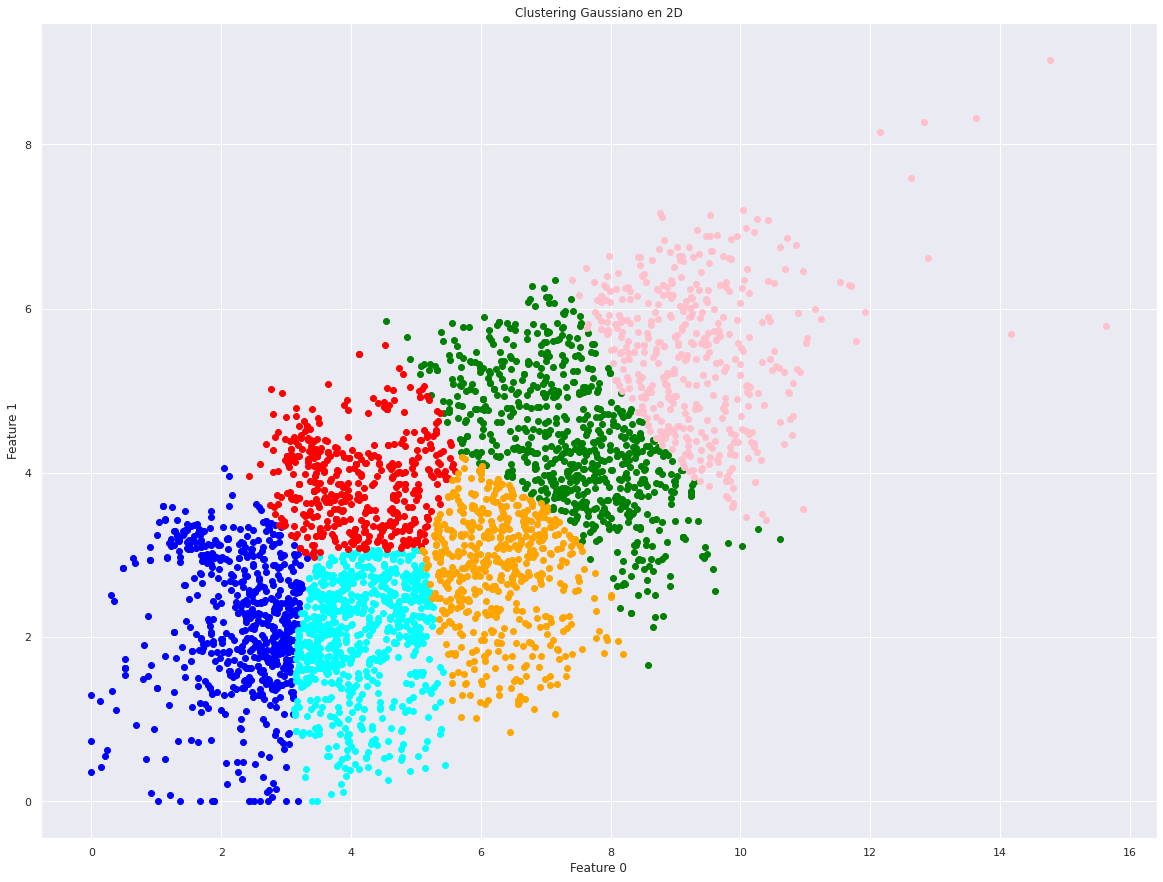

In [ ]:
gmm = GaussianMixture(n_components=6)
gmm.fit(a)

#predictions from gmm
labels = gmm.predict(a)
frame = pd.DataFrame(a)
frame['cluster'] = labels
frame.columns = ['feature_0', 'feature_1', 'cluster']

color=['blue','green','cyan','red','pink','orange']
for k in range(len(color)):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["feature_0"],data["feature_1"],c=color[k])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Clustering Gaussiano en 2D")
plt.show()